# DATA PREPARATION

-----

### Oleksandr Lapchenko


# Plan
----
- About me
- Why do we prepare our data?
- How to prepare your data? 6 steps to success
- Final Thoughts
- Happy saturday evening 


# About me

Software developer by profession, passion to sleep. Casual ML hobbyist.  

![a](pics/ds_hackaton.jpg)

![a](pics/quote.jpg)

# Why do we prepare our data?


![caption](gifs/3_clean_this.gif)

- we receive data from different sources
- human errors
- natural imbalances in data
- machine learning algorith requirments



# 7 steps plan to your hapiness and success in life
![caption](gifs/0_success.gif)

1. Collect data
2. Explore data to get insights
3. Clean data to make it consistent
4. Deal with ourliers
5. Deal with Imbalanced data 
6. Transform data
7. Secret one

# 1. Collect your data
![caption](gifs/1_plane_riging.gif)

![caption](gifs/2_matrix.gif)

In [29]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

%config InlineBackend.figure_format = 'svg'

# Increase the default plot size
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4


In [122]:
import numpy as np
import pandas as pd
df = pd.read_csv('data/telecom_churn.csv')
df_house = pd.read_csv('data/train.csv')
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [112]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


# 2. Explore data
![a](gifs/2_explore.gif)

We try to understand and summarize a dataset **without making any assumptions** about its contents.

Benefits:
- validate assumptions 
- you get intuition about your data
- validating the data

# Ask questions

## Univariate visualization of and summary statistics for each field in the raw dataset
![caption](pics/eda_1.png)

## Bivariate visualization and summary statistics for assessing the relationship between each variable in the dataset and the target variable of interest (e.g. time until churn, spend)
![caption](pics/eda_2.png)

## Multivariate visualizations to understand interactions between different fields in the data
![caption](pics/eda_3.png)

## Dimensionality reduction to understand the fields in the data that account for the most variance between observations and allow for the processing of a reduced volume of data
    

## Clustering of similar observations in the dataset into differentiated groupings, which by collapsing the data into a few small data points, patterns of behavior can be more easily identified
![caption](pics/eda_4.png)

You need few libraries:
- pandas
- matplotlib
- seaborn
- other libs may help too


## For inspiration use [Seaborn](https://seaborn.pydata.org/examples/index.html) and [Kaggle](https://www.kaggle.com/)
![cap](pics/seaborn.png)

# Practical example

I use code from this article: 
https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-2-visual-data-analysis-in-python-846b989675cd

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


- we can easily find type of each column
- we can see missing values

# Univariate visualization is all about distribution

In [168]:
# run simple analysys
df['Total day minutes'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Total day minutes, dtype: float64

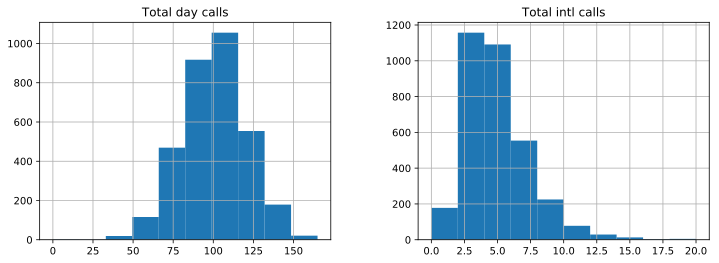

In [169]:
features = ['Total day calls', 'Total intl calls']
df[features].hist(figsize=(12, 4));

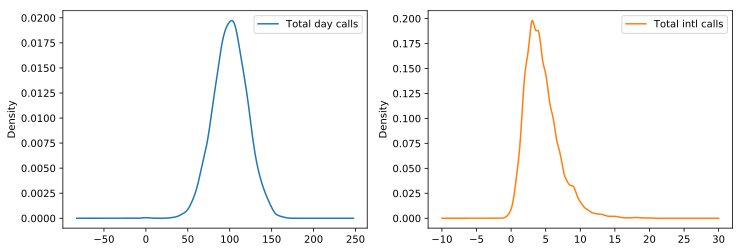

In [170]:
# Ядрова оцінка густини розподілу
# Kernel density plot
df[features].plot(kind='density', subplots=True, 
                  layout=(1, 2), sharex=False, figsize=(12, 4));

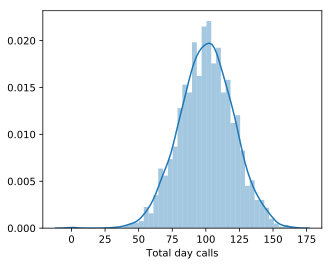

In [171]:
sns.distplot(df['Total day calls']);

# BoxPlot

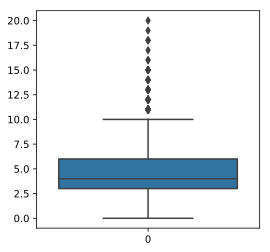

In [175]:


_, ax = plt.subplots(figsize=(4, 4))

sns.boxplot(data=df['Total intl calls'], ax=ax);

# Violin Plot

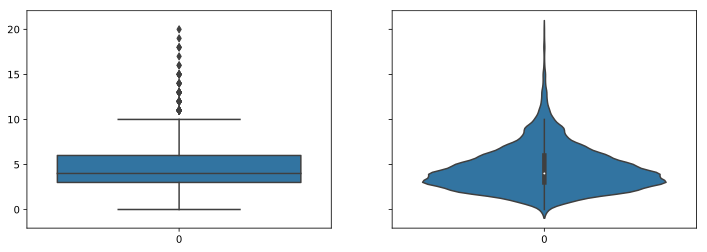

In [176]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 4))

sns.boxplot(data=df['Total intl calls'], ax=axes[0]); sns.violinplot(data=df['Total intl calls'], ax=axes[1]);

# Categorical and binary features

In [177]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

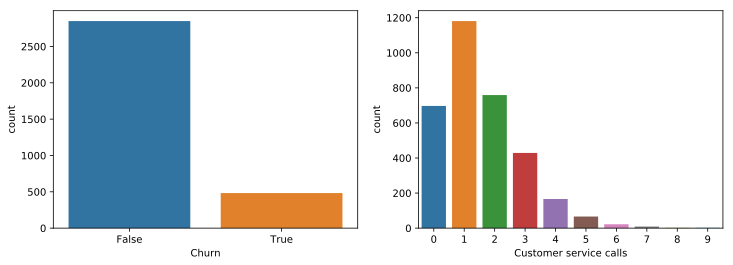

In [178]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=df, ax=axes[0]);
sns.countplot(x='Customer service calls', data=df, ax=axes[1]);

# Multivariate visualization

## Quantitative–Quantitative

### Correlation matrix

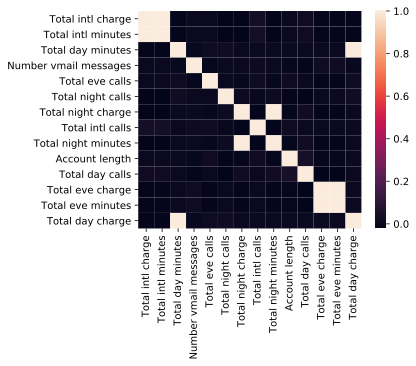

In [186]:
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                 set(['State', 'International plan', 
                      'Voice mail plan', 'Area code', 'Churn',
                      'Customer service calls']))

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

In [188]:

numerical = list(set(numerical) - 
                 set(['Total day charge', 'Total eve charge', 
                      'Total night charge', 'Total intl charge']))
numerical

['Total intl minutes',
 'Total day minutes',
 'Total eve calls',
 'Number vmail messages',
 'Total night calls',
 'Total intl calls',
 'Total night minutes',
 'Total day calls',
 'Account length',
 'Total eve minutes']

## It can also look like this
![Correlation](pics/correlation.png)

# Scatter plot

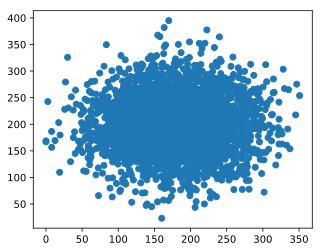

In [189]:
plt.scatter(df['Total day minutes'], df['Total night minutes']);

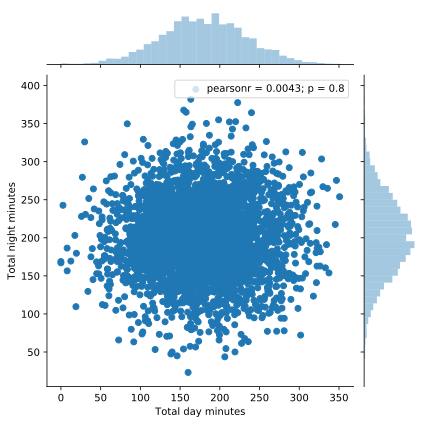

In [190]:
sns.jointplot(x='Total day minutes', y='Total night minutes',
              data=df, kind='scatter');

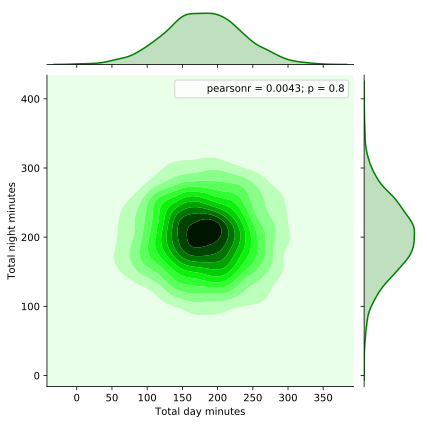

In [192]:
# bivariate version of the Kernel Density Plot

sns.jointplot('Total day minutes', 'Total night minutes',
              data=df, kind="kde", color="g");

# Scatterplot matrix

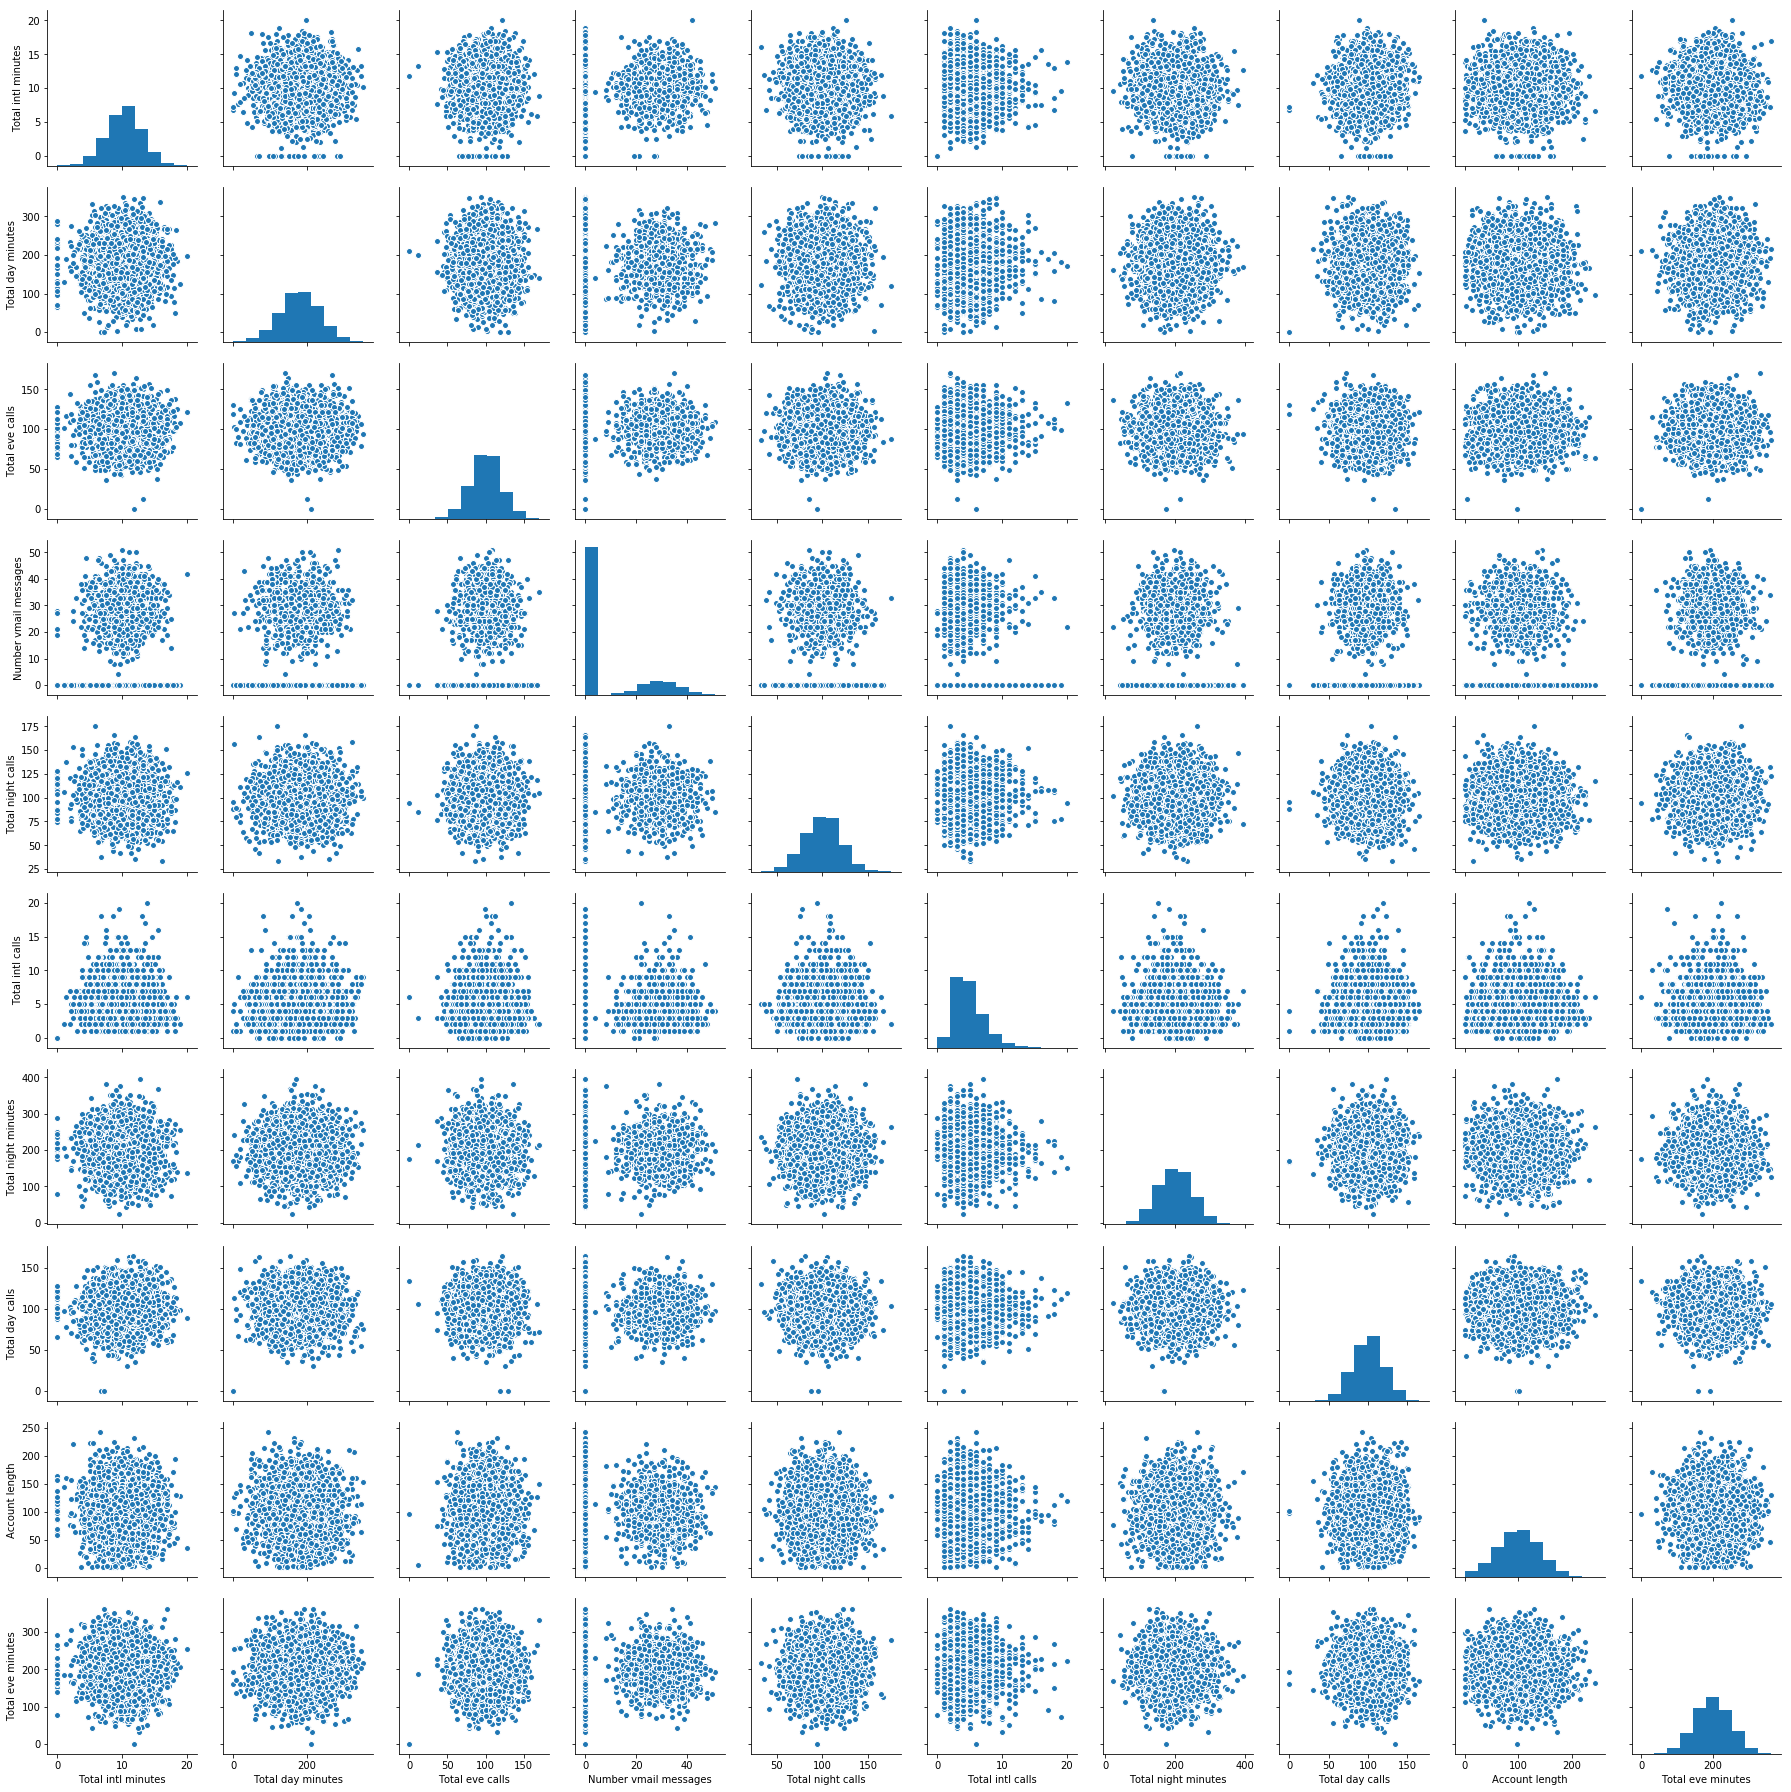

In [193]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df[numerical]);

![a](pics/scatterplot_part.png)

# Quantitative–Categorical

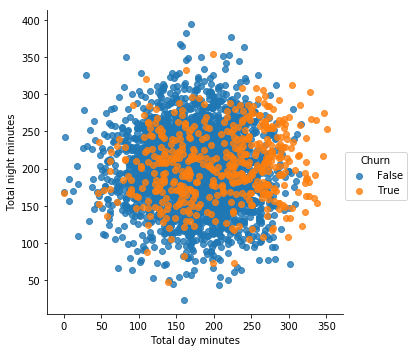

In [235]:
sns.lmplot('Total day minutes', 'Total night minutes', data=df, 
           hue='Churn', fit_reg=False);

# Two disjoint groups
The loyal customers (Churn=False) and those who left (Churn=True).

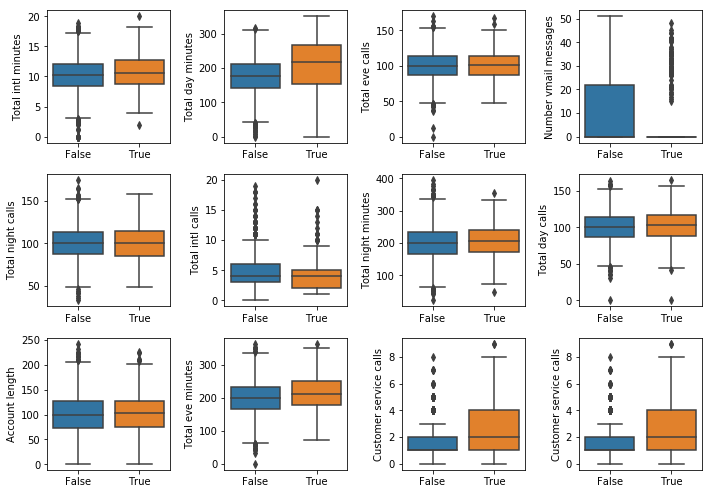

In [204]:
numerical.append('Customer service calls') 

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))

for idx, feat in enumerate(numerical): 
    ax = axes[int(idx / 4), idx % 4] 
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax) 
    ax.set_xlabel('') 
    ax.set_ylabel(feat) 
fig.tight_layout();

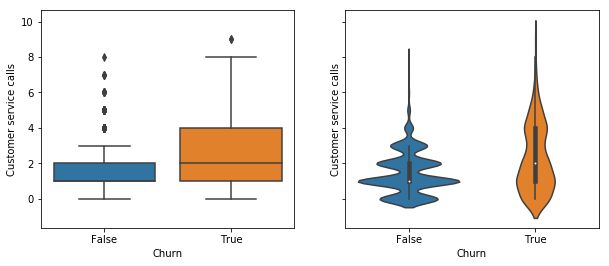

In [207]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4)) 

sns.boxplot(x='Churn', y='Customer service calls',
            data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Customer service calls', 
               data=df, ax=axes[1]);

## Analyze Total day minutes and two categorical variables 

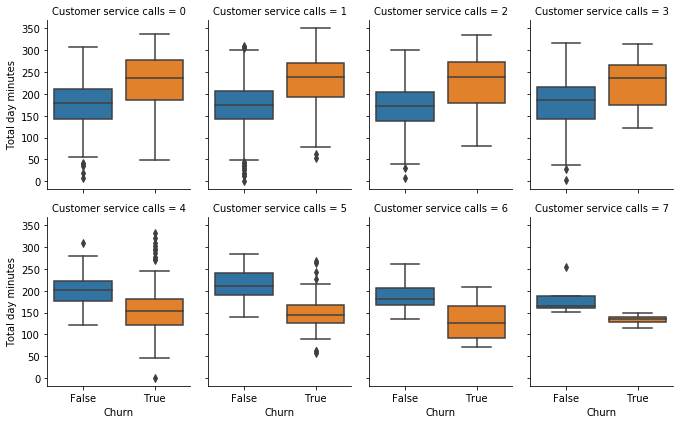

In [208]:
sns.factorplot(x='Churn', y='Total day minutes',
               col='Customer service calls',
               data=df[df['Customer service calls'] < 8], 
               kind="box", col_wrap=4, size=3, aspect=.8);

# Categorical–Categorical

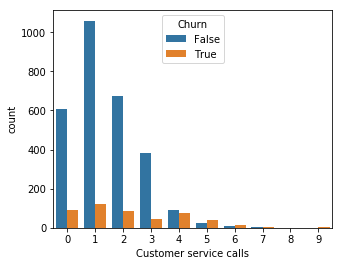

In [213]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

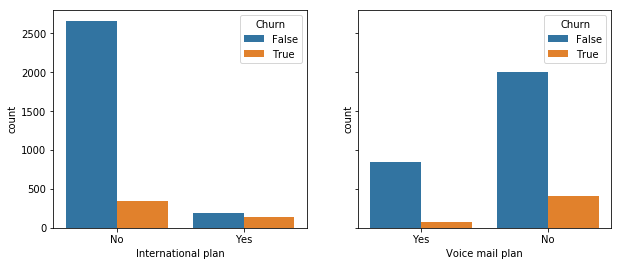

In [214]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4)) 

sns.countplot(x='International plan', hue='Churn',
              data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn',
              data=df, ax=axes[1]);

# Dimensionality reduction

In [216]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# convert categories to binary

X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [217]:
# Scale our data 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [219]:
%%time 
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 1min 11s, sys: 6.63 s, total: 1min 18s
Wall time: 1min 18s


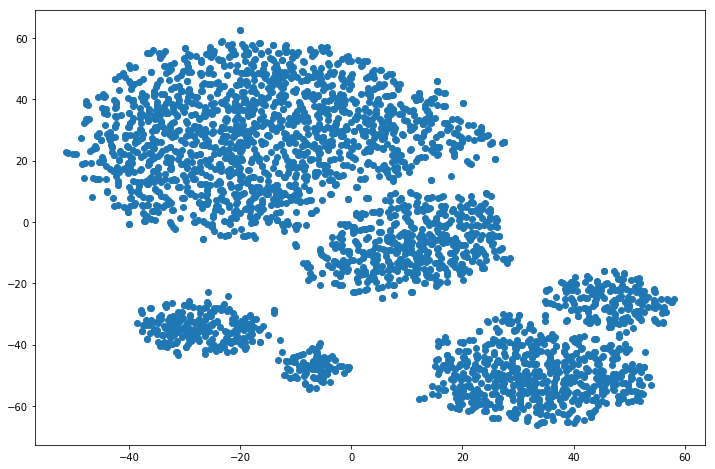

In [227]:
plt.figure(figsize=(12, 8))
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1]);

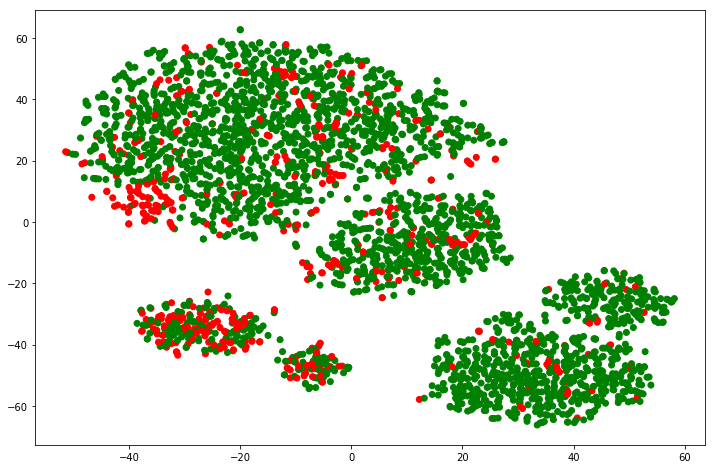

In [226]:
plt.figure(figsize=(12, 8))
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
            c=df['Churn'].map({False: 'green', True: 'red'}));

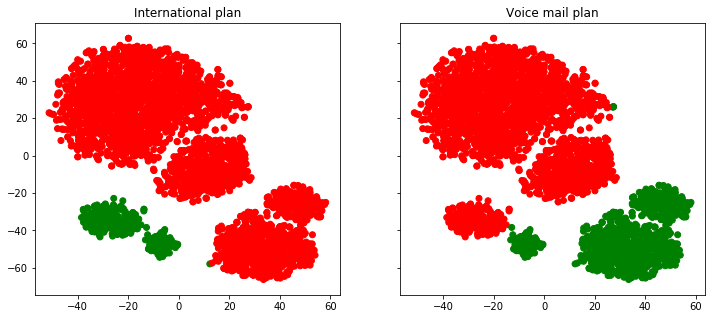

In [228]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1],
                    c=df[name].map({'Yes': 'green', 'No': 'red'}))
    axes[i].set_title(name)

In [229]:
# MNIST tSNE

![a](pics/mnist.png)

# 3. Clean data to make it consistent
![a](gifs/3_clean.gif)

## Check data format

Check you data, and apply conversion if needed:
- convert USD5.50 versus $5.50 money format to decimal
- convert dates `2016-01-23` and unix timestamps `1550318116`
- convert celsium and fahrenheits 

## Fix missing values

- dropping instances
- dropping attributes
- imputing the attribute mean for all missing values
- imputing the attribute median for all missing values
- imputing the attribute mode for all missing values
- using regression to impute attribute missing values 


![a](pics/listwise-deletion.jpg)

![b](pics/pairwise-deletion.jpg)

![a](pics/imputation-by-averaging.jpg)

In [ ]:
# Drop the columns where all elements are missing values:
df.dropna(axis=1, how='all')

# Drop the columns where any of the elements are missing values
df.dropna(axis=1, how='any')

# Keep only the rows which contain 2 missing values maximum
df.dropna(thresh=2)

In [ ]:
# Drop the columns where any of the elements are missing values
df.dropna(axis=1, how='any')

# Fill all missing values with the mean of the particular column
df.fillna(df.mean())

# Fill any missing value in column 'A' with the column median
df['A'].fillna(df['A'].median())

# Fill any missing value in column 'Depeche' with the column mode
df['Depeche'].fillna(df['Depeche'].mode())

# 4. Deal or not to deal with outliers?
![a](pics/outlier.png)

![a](pics/anomaly.png)

Investigate first!

What's impact of outliers to your model perfomance?

![a](pics/black-swan.jpg)

- can be result of poor data collection
- can be good anomalous data

## Examples

If it's obvious that the outlier is due to incorrectly entered or measured data, you should drop outlier.

```
Height 1.8 cm
Weight 0.89 kg, it can be 8.9kg, 89kg or even 98kg  we don't know
When price is too big
Body temperature 66 degres
Movenment speed of car 1500 kmh(real examples)
```


![a](pics/outliers-1.gif)

![a](pics/outliers-2.gif)

![a](pics/outliers-3.gif)

## When you have normal distribution, you can filter by 2-3 sigma

In [73]:
import numpy

arr = [10, 386, 479, 627, 20, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543]

elements = numpy.array(arr)

mean = numpy.mean(elements, axis=0)
sd = numpy.std(elements, axis=0)

final_list = [x for x in arr if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]
# print(final_list)

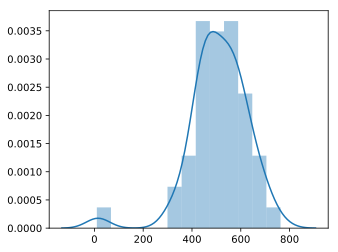

In [75]:
sns.distplot(elements)

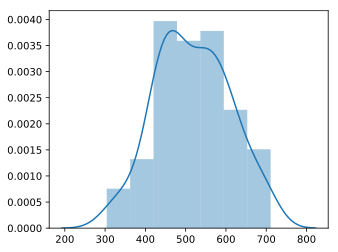

In [74]:
sns.distplot(final_list)

# 5. Deal with Imbalanced data
![a](gifs/5_balance.gif)

What one class otperforms other?
![a](pics/imbalanced-data-1.png)

## Change your metric:
- Precision/Specificity: how many selected instances are relevant.
- Recall/Sensitivity: how many relevant instances are selected.
- F1 score: harmonic mean of precision and recall.
- MCC: correlation coefficient between the observed and predicted binary classifications.
- AUC: relation between true-positive rate and false positive rate. 

![a](pics/precision_recall.png)

![a](pics/precision-recall-relevant-selected.jpg)

## Resample the training set
- Under-sample - reduce the size of abundant class
- Over-sample - increse the size of rare samples

# Use K-fold Cross-Validation in the right way

![a](pics/K-fold_cross_validation_EN.jpg)

![a](pics/kfold_stratified.png)

# Ensemble different resampled datasets


R class - 1000 cases, A class - 10 000 cases, N of models - 10
Keep R and randomly sample A in N groups, than train models with balanced data
![a](pics/imbalanced-data-2.png)

# Resample with different ratios

![a](pics/imbalanced-data-3.png)

# Cluster the abundant class

So imagine you have R rare samples, you can cluster abundant class in R clusters and keep medoid(centre of cluster). Throw out abundant and train with medoids only.

# Design your own models

![a](pics/imbalanced-data-4.png)

# 6. Data Transformation
![a](gifs/6_transform.gif)

![a](pics/original-zeroed-normalized.jpeg)


Influenced by feature scaling:
- Linear models
- Nearest neighbor classifiers
- Neural networks 

Not influenced by feature scaling:
- Plain old decision trees
- Random forests
- Gradient boosted trees 

# Why this happen?
![a](pics/knn-trees.jpg)

# Min/Max Scaling
![a](pics/min-max-formula.png)
- This method scales values between 0 and 1 [0, 1]
- Sets minimum equal to zero, maximum equal to one, and all other values scaled accordingly in between
- The Scikit-learn sklearn.preprocessing.MinMaxScaler module is such an implementation 

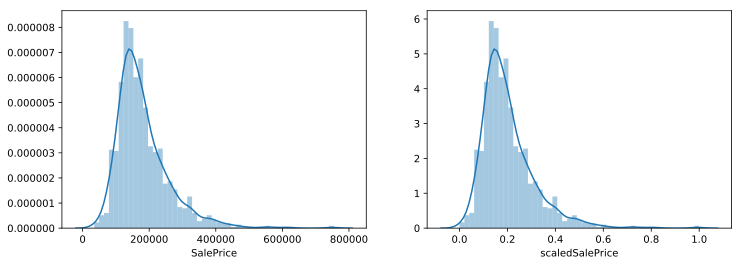

In [167]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()


saleDt = df_house[['SalePrice']]
saleDt['scaledSalePrice'] = sc.fit_transform(df_house[['SalePrice']])
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.distplot(saleDt['SalePrice'], hist=True, rug=False, ax=axes[0])
sns.distplot(saleDt['scaledSalePrice'], hist=True, rug=False, ax=axes[1])

# Standard Scaling

![a](pics/standardization-formula.jpg)
- This method scales by setting the mean of the data to 0, and the standard deviation to 1
- Subtracts the mean value from feature value, and divides by standard deviation
- This results in the standardized distribution
- The Scikit-learn sklearn.preprocessing.StandardScaler module is such an implementation 

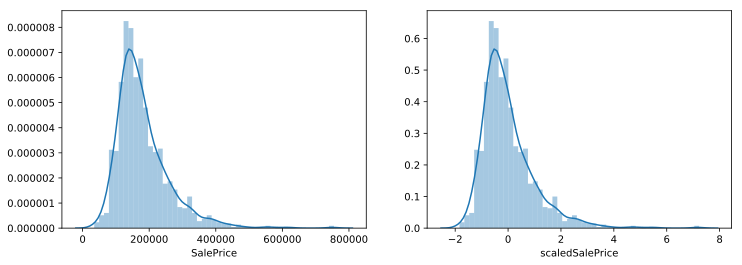

In [166]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


saleDt = df_house[['SalePrice']]
saleDt['scaledSalePrice'] = sc.fit_transform(df_house[['SalePrice']])
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.distplot(saleDt['SalePrice'], hist=True, rug=False, ax=axes[0])
sns.distplot(saleDt['scaledSalePrice'], hist=True, rug=False, ax=axes[1])

# Clipping
Keep values between upper and lower bounds. Say, 99th percentiles only. This technique is called *winsorization*. 

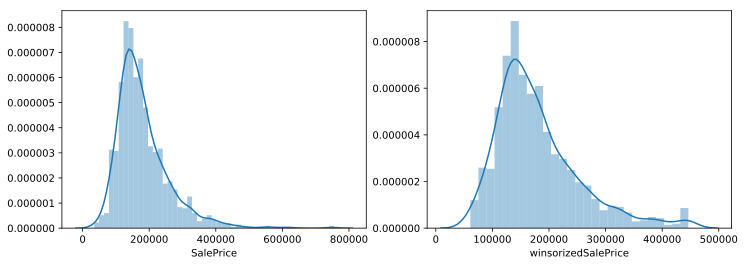

In [163]:
from scipy.stats.mstats import winsorize
saleDt = df_house[['SalePrice']]
saleDt['winsorizedSalePrice'] = winsorize(df_house['SalePrice'], limits= 0.01)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.distplot(saleDt['SalePrice'], hist=True, rug=False, ax=axes[0])
sns.distplot(saleDt['winsorizedSalePrice'], hist=True, rug=False, ax=axes[1])


# Rank Transform

Convert data to rank(first, second, third...). 
Valid approach for linear models, kNN and neural networks.

In [96]:
from scipy.stats import rankdata
data = [0, 2, 5, 2, 0.1]
print(data)
print(rankdata(data))
print(rankdata(data, method='min'))
print(rankdata(data, method='max'))
print(rankdata(data, method='dense'))
print(rankdata(data, method='ordinal'))

[0, 2, 5, 2, 0.1]
[1.  3.5 5.  3.5 2. ]
[1 3 5 3 2]
[1 4 5 4 2]
[1 3 4 3 2]
[1 3 5 4 2]


# Log Transform
- way to normalize data

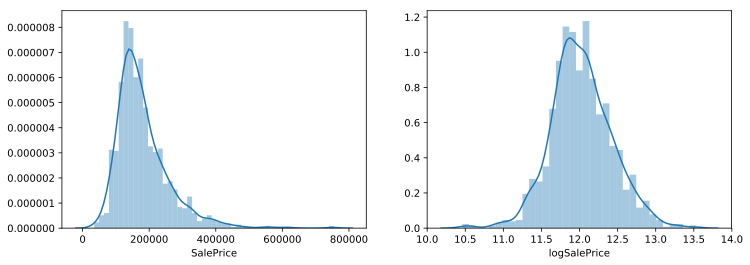

In [151]:
saleDt = df_house[['SalePrice']]
saleDt['logSalePrice'] = np.log(df_house['SalePrice'])
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.distplot(saleDt['SalePrice'], hist=True, rug=False, ax=axes[0])
sns.distplot(saleDt['logSalePrice'], hist=True, rug=False, ax=axes[1])



# 7. Secret one
![a](gifs/7_secret.gif)

...

# Have a good sleep
![a](gifs/7_1_sleep.gif)

# Final Thoughts
<ready_to_roll>

- follow my 7 step program
- check Kaggle for inspiration
- experiment a lot
- learn stats
- have fun 

# Happy saturday evening!
![a](gifs/8_bye.gif)


# References

- Data preparation
    - https://www.kdnuggets.com/2018/12/six-steps-master-machine-learning-data-preparation.html
    - https://www.kdnuggets.com/2018/12/common-mistakes-data-science.html
    - https://www.kdnuggets.com/2017/06/7-steps-mastering-data-preparation-python.html
    - https://www.kdnuggets.com/2017/04/value-exploratory-data-analysis.html
    - https://www.kdnuggets.com/2018/10/notes-feature-preprocessing-what-why-how.html
    - https://www.statisticshowto.datasciencecentral.com/heterogeneity/

- Missing data
    - https://clevertap.com/blog/how-to-treat-missing-values-in-your-data-part-i/
    - https://clevertap.com/blog/how-to-treat-missing-values-in-your-data-part-ii/
    
- Outliers 
    - https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/
    - https://stats.stackexchange.com/questions/200534/is-it-ok-to-remove-outliers-from-data/200923
    - https://www.kdnuggets.com/2017/01/3-methods-deal-outliers.html
    - https://www.kdnuggets.com/2017/02/removing-outliers-standard-deviation-python.html
    - https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles

- Imbalanced data
    - https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html
    - https://machinelearningmastery.com/k-fold-cross-validation/
    - https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/
    - https://www.quora.com/In-classification-how-do-you-handle-an-unbalanced-training-set/answers/1144228?srid=h3G6o
    
- Transform data
- https://www.kdnuggets.com/2018/10/notes-feature-preprocessing-what-why-how.html

- Kaggle notebooks:
    - https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
    - https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-elo
    
- Open Data science cource 
    - https://habr.com/en/company/ods/blog/322626/
    - https://habr.com/en/company/ods/blog/323210/
    - https://habr.com/en/company/ods/blog/325422/



- https://becominghuman.ai/day-7-data-cleaning-all-that-you-need-to-know-about-it-23b05738abe7
- https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55
- https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-2-visual-data-analysis-in-python-846b989675cd
- https://medium.com/learning-machine-learning/present-your-data-science-projects-with-jupyter-slides-75f20735eb0f


